## The purpose of this file
Make an aggregate adjacency matrix and save it.
> Be sure to add $\tau$ (the number of snapshots you make) to the filename.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import pandas as pd
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "cheese"
hashtag = "チーズ"
timespan = "21-29"
file = f"../data/datasets/{tag}/{tag}_{timespan}.pkl"
df = tb.get_dataframe(hashtag, file)

In [3]:
start = "2022-11-22T00:00+09:00"
end = "2022-11-24T23:59+09:00"
timespan = "23-24"
start = pd.to_datetime(start)
end = pd.to_datetime(end)
DF = df[(start <= df.index) & (df.index <= end)]

In [4]:
#DF = df.copy()

In [5]:
#tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'minutes=15')
tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'hours=1')
print(f"tau = {tau}")

tau = 70


In [6]:
edgelst_of_snapshots = tb.get_edgelist_of_eachsnapshot(df,tau, snapshots)
filename = f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam'
print(filename)
G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots, fname=filename)
#G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots)

../data/graph_data/cheese/original/チーズ_23-24_70_aam


In [7]:
tb.check_degree(G)

singleton:[]


,degree
チーズ,18281
cheese,3080
ワイン,2674
ランチ,2466
グルメ,2099
...,...
ベームスター,2
服,1
パン記録,1
チーズ＃ワインのあて,1


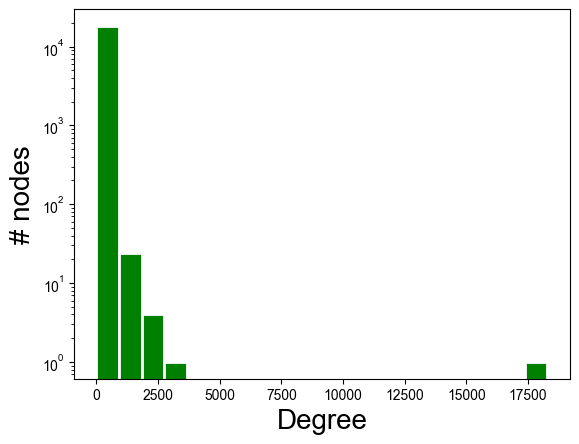

In [8]:
tb.plot_dd(G, 20)

In [9]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.35127937923059, 
its standard error sigma: 0.025943003397086925, 
k_min: 44.0


(2.35127937923059, 0.025943003397086925, 44.0)

In [10]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 7.795659656574023e-06.


In [11]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The lognormal distribution outperforms power_law distribution with significance level 0.2040880749303049.


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.35127937923059, 
its standard error sigma: 0.025943003397086925, 
k_min: 44.0


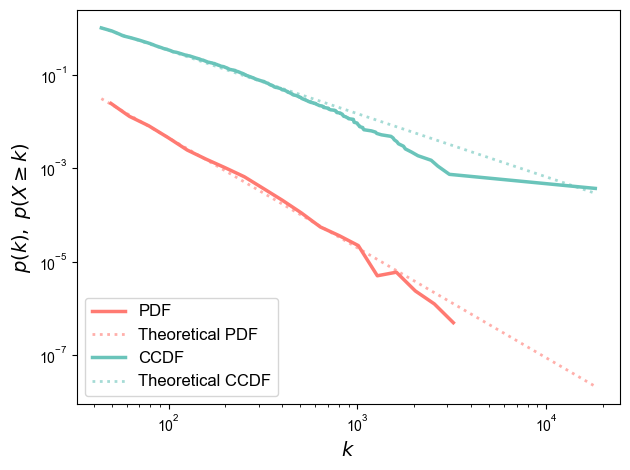

In [12]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")

以下は全期間で作ったネットワークが巨大すぎて次のファイルで次数分布を描画できないときのために作成

In [ ]:
G.remove_node(hashtag)
print(f"Isolates after removal of the searchtag: \n{list(nx.isolates(G))}")
print("These isolate nodes are to be removed.")
G.remove_nodes_from(list(nx.isolates(G)))
assert len(list(nx.isolates(G))) == 0, "There is at least one isolate node left."
print("============================================")
print("The isolate nodes were successfully deleted.")

In [ ]:
tb.check_degree(G)

In [ ]:
tb.fit_power_law(G)

In [ ]:
tb.compare_distribution(G,"power_law", "exponential")

In [ ]:
tb.compare_distribution(G,"power_law", "lognormal")

In [ ]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

In [ ]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)

In [ ]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [ ]:
# Save modified aam for statistical test
nx.write_graphml(G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')